# Some code to help you get started with our dataset

In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
QS = pd.read_csv('TRACKS_CL5_QS_Medcrossers.csv', header=0)
QS

,id,lon,lat,year,month,day,time,hPa,FT_MED_VEL_v,FT_MED_VEL_q,...,FT_TOT_DIST_c,AT_12h_DIST_v,AT_12h_DIST_q,AT_12h_DIST_c,AT_RAD_DIST_v,AT_RAD_DIST_q,AT_RAD_DIST_c,AT_CIRCLE_DIST_v,AT_CIRCLE_DIST_q,AT_CIRCLE_DIST_c
0,4,0.960,40.700,1979,1,8,18,1016.93,31.008,0.831,...,0.0,293.162,0.585,0.0,1554.441,0.513,2.0,259.569,0.573,0.0
1,4,1.080,40.761,1979,1,8,19,1016.93,31.008,0.831,...,0.0,313.308,0.628,0.0,1710.421,0.566,0.0,279.078,0.616,0.0
2,4,1.300,40.746,1979,1,8,20,1016.64,31.008,0.831,...,0.0,321.903,0.645,0.0,1779.949,0.588,0.0,288.992,0.636,0.0
3,4,1.624,40.699,1979,1,8,21,1016.35,31.008,0.831,...,0.0,319.393,0.640,0.0,1752.835,0.580,0.0,290.526,0.639,0.0
4,4,1.986,40.693,1979,1,8,22,1015.86,31.008,0.831,...,0.0,313.970,0.629,0.0,1687.237,0.558,0.0,287.221,0.633,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173785,3807,36.114,44.208,2020,9,8,2,1015.46,10.430,0.078,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
173786,3807,36.228,44.162,2020,9,8,3,1015.79,10.430,0.078,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
173787,3807,36.323,44.163,2020,9,8,4,1016.16,10.430,0.078,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
173788,3807,36.414,44.197,2020,9,8,5,1016.56,10.430,0.078,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Plot any one cyclone from the table and color timesteps according to different stationarity metrics

In [3]:
def plot_5panel(dataset, ID, padding, title_y, h_spacing):
    """
    Plot stationarity category maps for a given cyclone ID using the QS dataframe.
    
    Parameters:
    - QS: pd.DataFrame containing cyclone track and category data
    - ID: int, cyclone ID to plot
    """
    
    # Pick any cyclone based on its ID
    df_i = dataset[dataset.id == ID]
    timestamp = pd.to_datetime(df_i.iloc[:, 3:6])
    
    # Categories and labels
    cat_data = df_i.filter(like='_c').values.T
    labels = ['FT Median Velocity', 'FT Total Distance', '', 'AT Consecutive Distances', 'AT Radial Distances', 'AT Circle Distances']
    color_map = {0: 'darkgray', 1: '#e63946', 2: '#457b9d', 3: 'goldenrod', np.nan: '#f1faee'}
    
    # Initialize plot
    sns.set_style("whitegrid")
    fig, axs = plt.subplots(2, 3, figsize=(12, 9), subplot_kw={'projection': ccrs.PlateCarree()})
    axs = axs.flatten()
    
    # Loop through subplots
    cat_idx = 0
    for idx, ax in enumerate(axs):
        if idx == 2:
            ax.set_visible(False)
            continue
    
        # Base map
        ax.set_extent([
            df_i.lon.min() + padding[0], df_i.lon.max() + padding[1],
            df_i.lat.min() + padding[2], df_i.lat.max() + padding[3]
        ])
        ax.coastlines(alpha=0.5)
        ax.add_feature(cfeature.OCEAN, alpha=0.2)
        ax.gridlines(alpha=0.35, linewidth=1.5, color='gray')
        ax.set_aspect(1.15)
    
        # Colors and plot
        colors = [color_map.get(v, '#f1faee') for v in cat_data[cat_idx]]
        sns.scatterplot(x='lon', y='lat', data=df_i, ax=ax, c=colors, s=65, marker='o', edgecolor='k', alpha=1)
        ax.set_title(labels[idx], fontsize=11)
        cat_idx += 1
    
    # Legend
    legend_items = {
        'slow (stationary)': '#e63946',
        'median': '#457b9d',
        'fast (non-stationary)': 'goldenrod',
        'other': 'darkgray',
        'NA': '#f1faee'
    }
    legend = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=c, markeredgecolor='k', markersize=9, label=l)
              for l, c in legend_items.items()]
    axs[1].legend(handles=legend, title='Stationarity Categories', loc='center', bbox_to_anchor=(1.7, 0.5), title_fontsize=12, fontsize=10)
    
    # Title and layout
    plt.suptitle(f'MediCyclone ID {ID} ({timestamp.mean().strftime("%b. %Y")})', fontweight='bold', size=16, x=0.5, y=title_y)
    plt.subplots_adjust(hspace=h_spacing)
    plt.show()

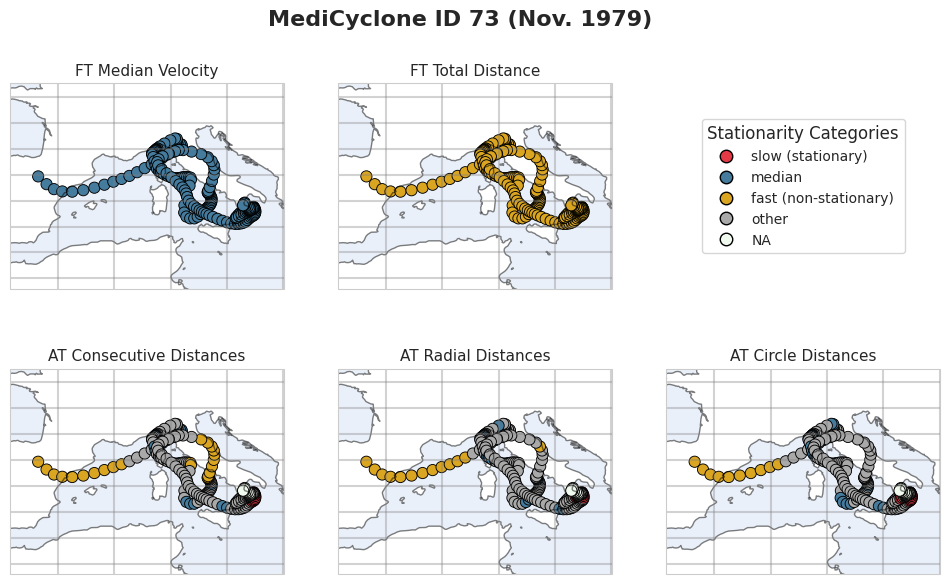

In [4]:
plot_5panel(QS, 73, [-2.5,+2.5,-5,+4], title_y=0.85, h_spacing=-0.3)

### Select all cyclone IDs that are categorised as stationary (slow/short) according to FT Median Velocity and AT Radial Distances

In [5]:
df1 = QS.loc[(QS['FT_MED_VEL_c'] == 1) & (QS['AT_RAD_DIST_c'] == 1), 'id'].unique()
df1

array([  13,   49,   55,   80,   81,   84,   85,  101,  183,  189,  198,
        219,  246,  269,  274,  279,  280,  317,  323,  351,  362,  365,
        422,  434,  457,  486,  494,  502,  511,  512,  515,  575,  590,
        599,  628,  631,  668,  680,  689,  720,  735,  740,  744,  774,
        775,  787,  818,  837,  868,  902,  924,  930,  939,  945,  947,
        948, 1000, 1019, 1021, 1028, 1035, 1038, 1039, 1093, 1100, 1119,
       1140, 1148, 1150, 1151, 1152, 1155, 1164, 1166, 1172, 1205, 1234,
       1241, 1251, 1294, 1301, 1322, 1324, 1334, 1363, 1371, 1373, 1386,
       1388, 1401, 1406, 1407, 1420, 1446, 1484, 1489, 1491, 1493, 1564,
       1565, 1621, 1639, 1680, 1682, 1683, 1684, 1690, 1715, 1745, 1762,
       1763, 1777, 1800, 1821, 1822, 1845, 1849, 1850, 1864, 1895, 1904,
       1928, 1930, 1951, 2006, 2008, 2024, 2025, 2077, 2082, 2087, 2092,
       2117, 2120, 2185, 2199, 2209, 2228, 2230, 2242, 2300, 2313, 2319,
       2353, 2390, 2391, 2411, 2415, 2417, 2418, 24

### Find cyclone with most number of stationary timesteps according to AT_12h_DIST_c

In [6]:
df2 = (
    QS.groupby('id')['AT_12h_DIST_c']
      .apply(lambda col: (col == 1).sum())
      .loc[lambda s: s > 0]
      .sort_values(ascending=False)
)
df2

id
2418    111
2411    106
2390     95
1155     93
1406     88
       ... 
907       1
107       1
3551      1
1316      1
3541      1
Name: AT_12h_DIST_c, Length: 973, dtype: int64

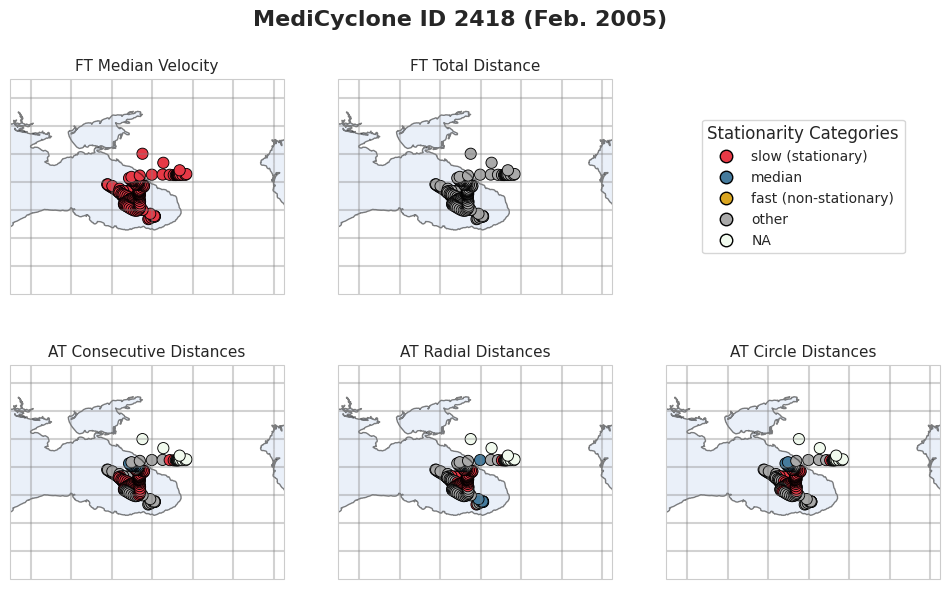

In [7]:
plot_5panel(QS, 2418, [-6,+6,-4,+4], title_y=0.85, h_spacing=-0.3)

### Seasonal distribution of slow cyclones according to FT_MED_VEL_c

In [8]:
total = QS[['id','month']]
slow  = QS[['id','month']][QS['FT_MED_VEL_c'] == 1]

In [9]:
def assign_season(df, month_col='month', season_col='season'):
    conditions = [
        df[month_col].isin([12, 1, 2]),
        df[month_col].isin([3, 4, 5]),
        df[month_col].isin([6, 7, 8]),
        df[month_col].isin([9, 10, 11])
    ]
    choices = ['Winter', 'Spring', 'Summer', 'Autumn']
    df.loc[:, season_col] = np.select(conditions, choices, default='Unknown')
    return df

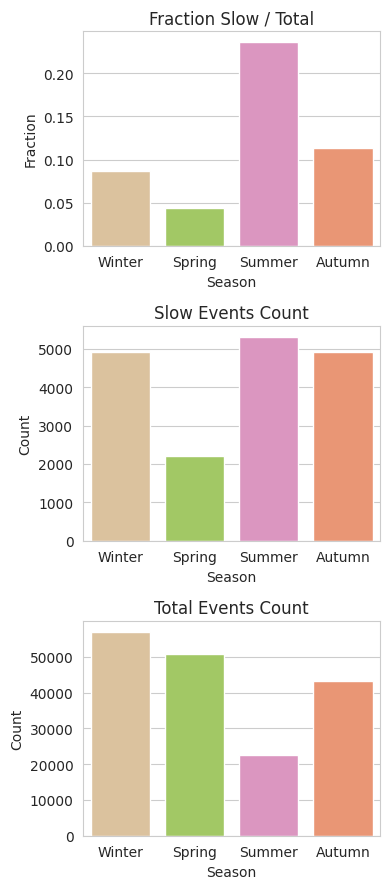

In [10]:
# Assign seasons to your dataframes
slow = assign_season(slow.copy())
total = assign_season(total.copy())

# Counts and fraction
count_slow = slow.groupby('season').size()
count_total = total.groupby('season').size()
frac = (count_slow / count_total).reset_index(name='fraction')
count_slow_df = count_slow.reset_index(name='count')
count_total_df = count_total.reset_index(name='count')

order = ['Winter', 'Spring', 'Summer', 'Autumn']
palette = 'Set2_r'

fig, axs = plt.subplots(3, 1, figsize=(4, 9), sharey=False)

sns.barplot(data=frac, x='season', y='fraction', order=order, palette=palette, ax=axs[0])
axs[0].set(title='Fraction Slow / Total', ylabel='Fraction', xlabel='Season')

sns.barplot(data=count_slow_df, x='season', y='count', order=order, palette=palette, ax=axs[1])
axs[1].set(title='Slow Events Count', ylabel='Count', xlabel='Season')

sns.barplot(data=count_total_df, x='season', y='count', order=order, palette=palette, ax=axs[2])
axs[2].set(title='Total Events Count', ylabel='Count', xlabel='Season')

plt.tight_layout()
plt.show()